# Predictive Analytics
# Module 3 - Inferential Statistics
## Demo 4 - Analysing Data & Relationships within Data

In [1]:
import pandas as pd
import numpy as np

## Perform Simple Statistical Analysis on Data

### Load sample dataset

In [2]:
from sklearn.datasets import load_boston
from sklearn.utils import shuffle

boston = load_boston()
X, y = shuffle(boston.data, boston.target, random_state=13)

In [3]:
df = pd.DataFrame(boston.data,columns= boston['feature_names'])
df['target'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

### Analyse target column

In [5]:
df.target.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: target, dtype: float64

### Plot Histogram

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'\nDeviates from the normal distribution. Have appreciable positive skewness. Show peakedness.\n'

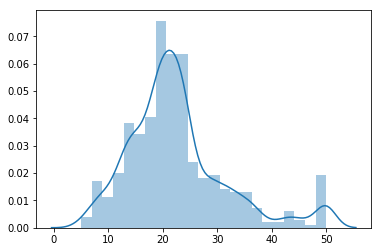

In [6]:
import seaborn as sns
%matplotlib inline

# histogram
sns.distplot(df.target.values);

"""
Deviates from the normal distribution. Have appreciable positive skewness. Show peakedness.
"""

### Visualise Relationships with other numerical variables using Scatter Plots

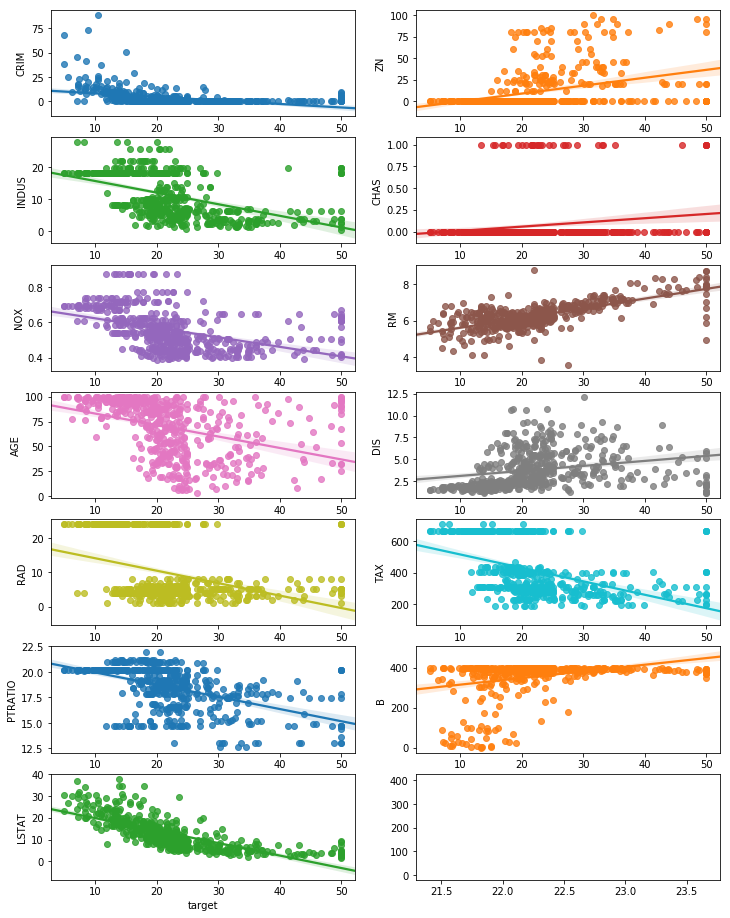

In [7]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2, nrows=7, figsize=(12, 16))
i = 0
j = 0
for var in ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']:
    sns.regplot(x='target', y=var, data=df, ax=axs[i][j])
    j += 1
    if j > 1:
        i += 1
        j = 0

### Correlation matrix

In [8]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### Plot a Correlation Matrix

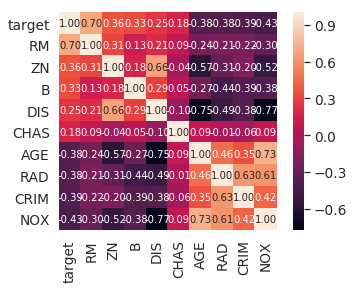

In [9]:
corrmat = df.corr()

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'target')['target'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,)
plt.show()

### Calculate the correlation between numerical variables using Pearson Correlation

In [10]:
from scipy.stats import pearsonr

for col in boston.feature_names:
    coef, pval = pearsonr(df[col], df.target)
    print("Correlation b/w target and %s - coef: %.2f, pval: %f" %(col, coef, pval))

Correlation b/w target and CRIM - coef: -0.39, pval: 0.000000
Correlation b/w target and ZN - coef: 0.36, pval: 0.000000
Correlation b/w target and INDUS - coef: -0.48, pval: 0.000000
Correlation b/w target and CHAS - coef: 0.18, pval: 0.000074
Correlation b/w target and NOX - coef: -0.43, pval: 0.000000
Correlation b/w target and RM - coef: 0.70, pval: 0.000000
Correlation b/w target and AGE - coef: -0.38, pval: 0.000000
Correlation b/w target and DIS - coef: 0.25, pval: 0.000000
Correlation b/w target and RAD - coef: -0.38, pval: 0.000000
Correlation b/w target and TAX - coef: -0.47, pval: 0.000000
Correlation b/w target and PTRATIO - coef: -0.51, pval: 0.000000
Correlation b/w target and B - coef: 0.33, pval: 0.000000
Correlation b/w target and LSTAT - coef: -0.74, pval: 0.000000
